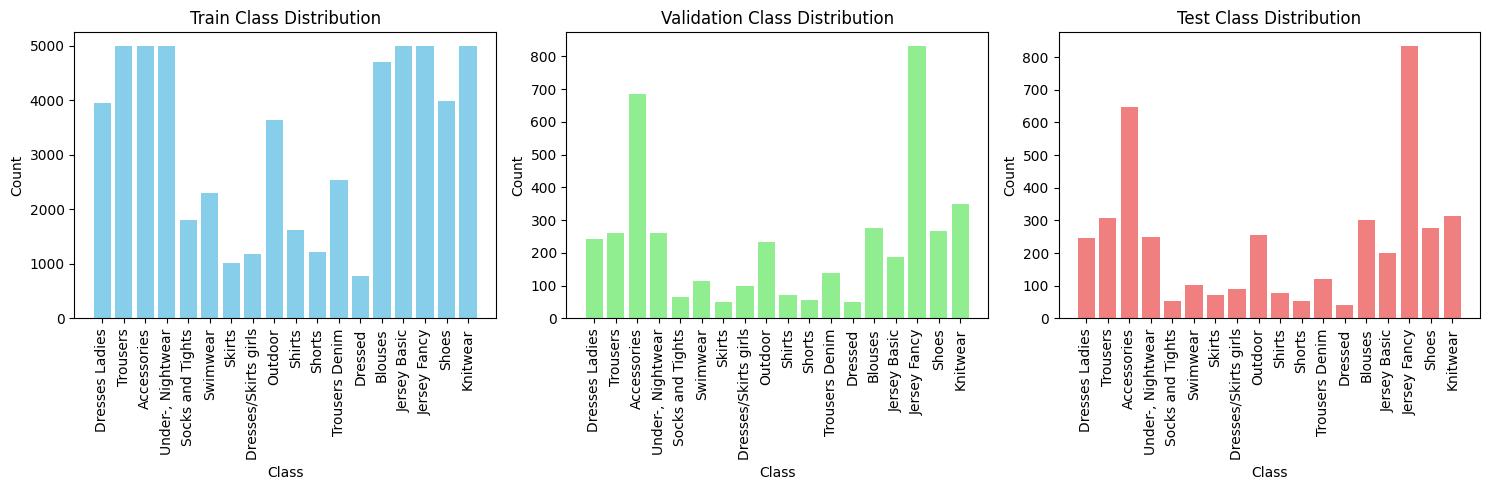

In [76]:
import matplotlib.pyplot as plt
import importlib
import model_functions, utils, training, datasets
def update():# if you change our files
    import model_functions, utils, training, datasets
    for lib in [model_functions, utils, training, datasets]:
        importlib.reload(lib)# issues with not updating
update()

# Data
train_data = {'Dresses Ladies': 3947, 'Trousers': 5000, 'Accessories': 5000, 'Under-, Nightwear': 5000, 
              'Socks and Tights': 1798, 'Swimwear': 2301, 'Skirts': 1016, 'Dresses/Skirts girls': 1184, 
              'Outdoor': 3644, 'Shirts': 1623, 'Shorts': 1228, 'Trousers Denim': 2532, 'Dressed': 772, 
              'Blouses': 4701, 'Jersey Basic': 5000, 'Jersey Fancy': 5000, 'Shoes': 3989, 'Knitwear': 5000}

val_data = {'Dresses Ladies': 244, 'Trousers': 261, 'Accessories': 685, 'Under-, Nightwear': 261, 
            'Socks and Tights': 65, 'Swimwear': 115, 'Skirts': 51, 'Dresses/Skirts girls': 99, 
            'Outdoor': 232, 'Shirts': 73, 'Shorts': 55, 'Trousers Denim': 138, 'Dressed': 49, 
            'Blouses': 277, 'Jersey Basic': 187, 'Jersey Fancy': 832, 'Shoes': 267, 'Knitwear': 348}

test_data = {'Dresses Ladies': 246, 'Trousers': 306, 'Accessories': 647, 'Under-, Nightwear': 249, 
             'Socks and Tights': 55, 'Swimwear': 101, 'Skirts': 73, 'Dresses/Skirts girls': 90, 
             'Outdoor': 254, 'Shirts': 77, 'Shorts': 54, 'Trousers Denim': 120, 'Dressed': 41, 
             'Blouses': 301, 'Jersey Basic': 200, 'Jersey Fancy': 834, 'Shoes': 277, 'Knitwear': 315}



# Plot histograms without sharing the same scale
utils.plot_histograms_different_scales(train_data, val_data, test_data)



In [80]:
import pandas as pd
HM_DATA_PATH_NEW = "../dataset/"
df = pd.read_csv(HM_DATA_PATH_NEW+'articles_filtered.csv')


main_classes = ['prod_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'perceived_colour_master_name']
main_classes += ['product_type_name','product_group_name','colour_group_name','graphical_appearance_name']

columns_of_interest = main_classes

# Function to compute statistics for each column
def get_column_stats(df, column):
    return df[column].value_counts().agg(
        Example=lambda x: x.index[0],
        Unique=lambda x: x.count(),  # Number of unique values
        Max=lambda x: x.max(),  # Max occurrences
        Min=lambda x: x.min(),  # Min occurrences
        Mean=lambda x: x.mean(),  # Mean occurrences
        Median=lambda x: x.median(),  # Median occurrences
        Random=lambda x: round(1/x.count()*100,1)
        
    )

# Apply the function to each column of interest
stats = {col: get_column_stats(df, col) for col in columns_of_interest}


# Convert the dictionary to a DataFrame for better readability

stats_df = pd.DataFrame(stats).T#.astype(int)

stats_df['BL%'] = ['-', '7.0', '25.2','28.2','16.4','35.2','56.7','29.8','46.9','31.9','17.0']
# Display the stats
stats_df['SP%'] = ['-', '7.0', '25.2','28.2','16.4','35.2','56.7','29.8','46.9','31.9','17.0']

stats_df = stats_df.astype({
    'Max': 'int',
    'Min': 'int',
    'Median': 'int',
    'Mean': 'int',
    
})


stats_df = stats_df.rename(columns={'Random': 'Rand%'})
print(stats_df.to_string(index=True))

                                                 Example Unique    Max   Min   Mean  Median Rand%   BL%   SP%
prod_name                                Dragonfly dress  45727     98     1      2       1   0.0     -     -
department_name                                   Jersey    250   4601     1    420     261   0.4   7.0   7.0
index_name                                    Ladieswear     10  25951  3381  10509    9023  10.0  25.2  25.2
index_group_name                              Ladieswear      5  39551  3381  21019   15084  20.0  28.2  28.2
section_name                  Womens Everyday Collection     56   7281     4   1876    1702   1.8  16.4  16.4
garment_group_name                          Jersey Fancy     21  21415   906   5004    3870   4.8  35.2  35.2
perceived_colour_master_name                       Black     20  22478     3   5254    2913   5.0  56.7  56.7
product_type_name                               Trousers    131  11150     1    802     113   0.8  29.8  29.8
product_gr